### Récupération du dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

display(df)
df.info()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Gestion des doublons et des valeurs manquantes

In [2]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Vérification de la validité des données

CHAS
0    471
1     35
Name: count, dtype: int64
RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64


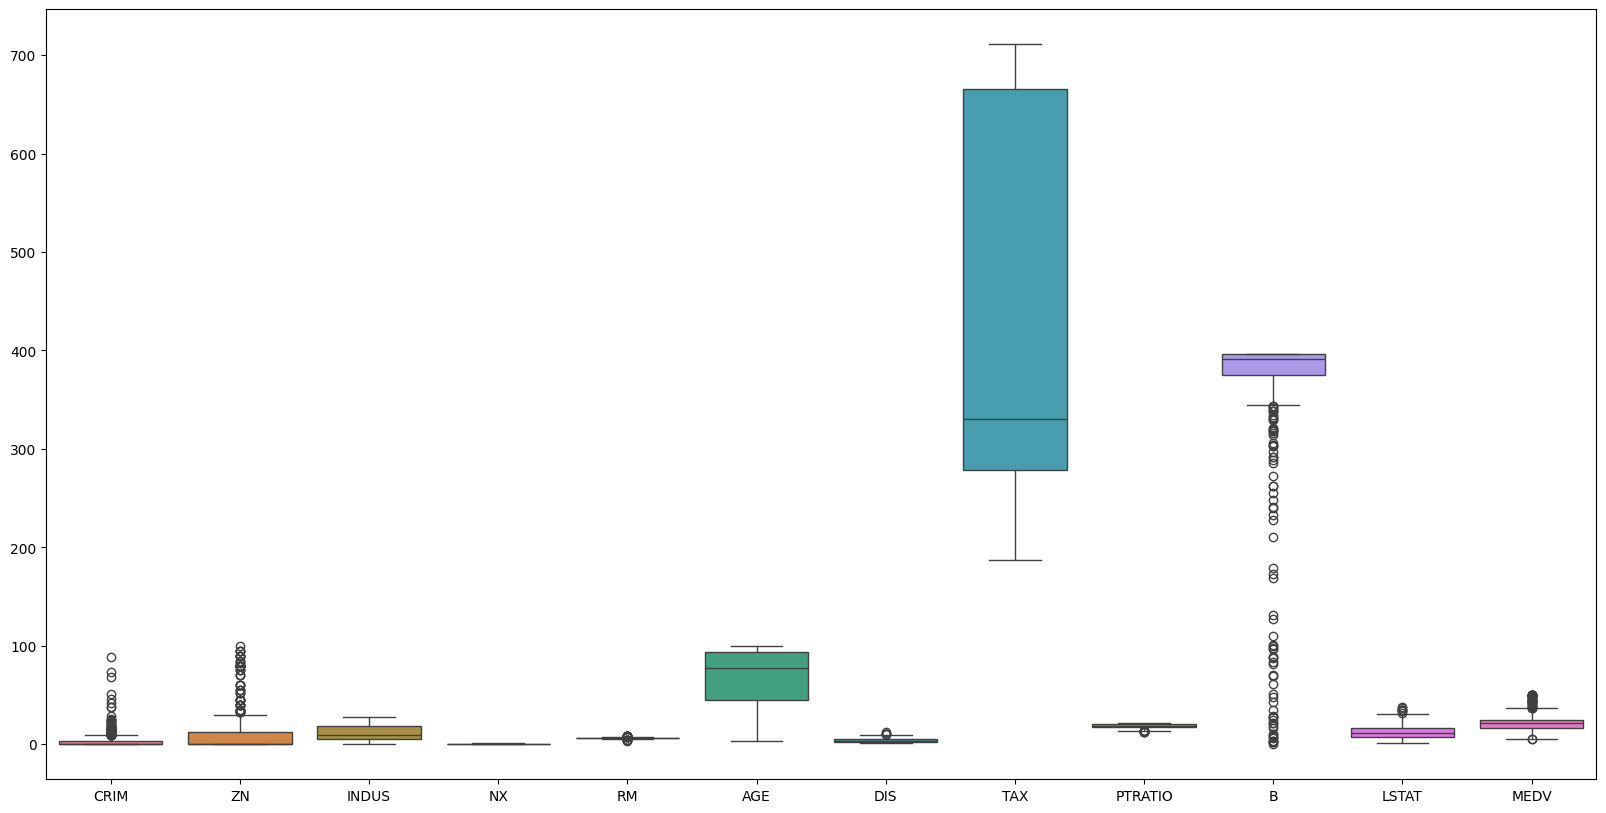

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier la distribution des données qualitatives
print (df['CHAS'].value_counts())
print (df['RAD'].value_counts())

# Vérifier la distribution des données quantitatives
plt.figure(figsize=(20, 10))
sns.boxplot(df.drop(['CHAS', 'RAD'], axis=1))
plt.show()
# Les données semblent cohérentes

### Analyse des relations entre les données

<Axes: >

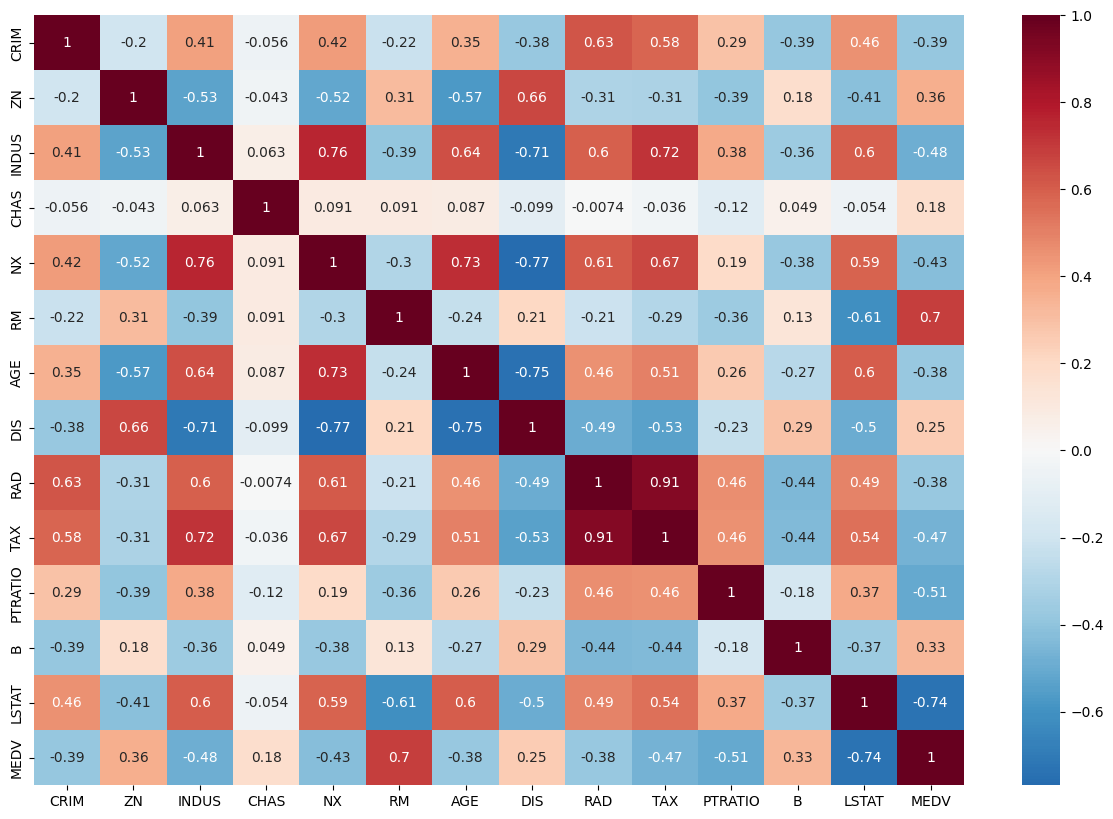

In [4]:
# Matrice de corrélation entre les différentes variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),center=0,cmap='RdBu_r',annot=True)

# Les variables TAX et RAD sont très fortement corrélées
# CHAS est très peu corrélée avec la cible MEDV

# On ne les retire pas, car on va utiliser Ridge et Lasso qui sont sensées pénaliser ces variables

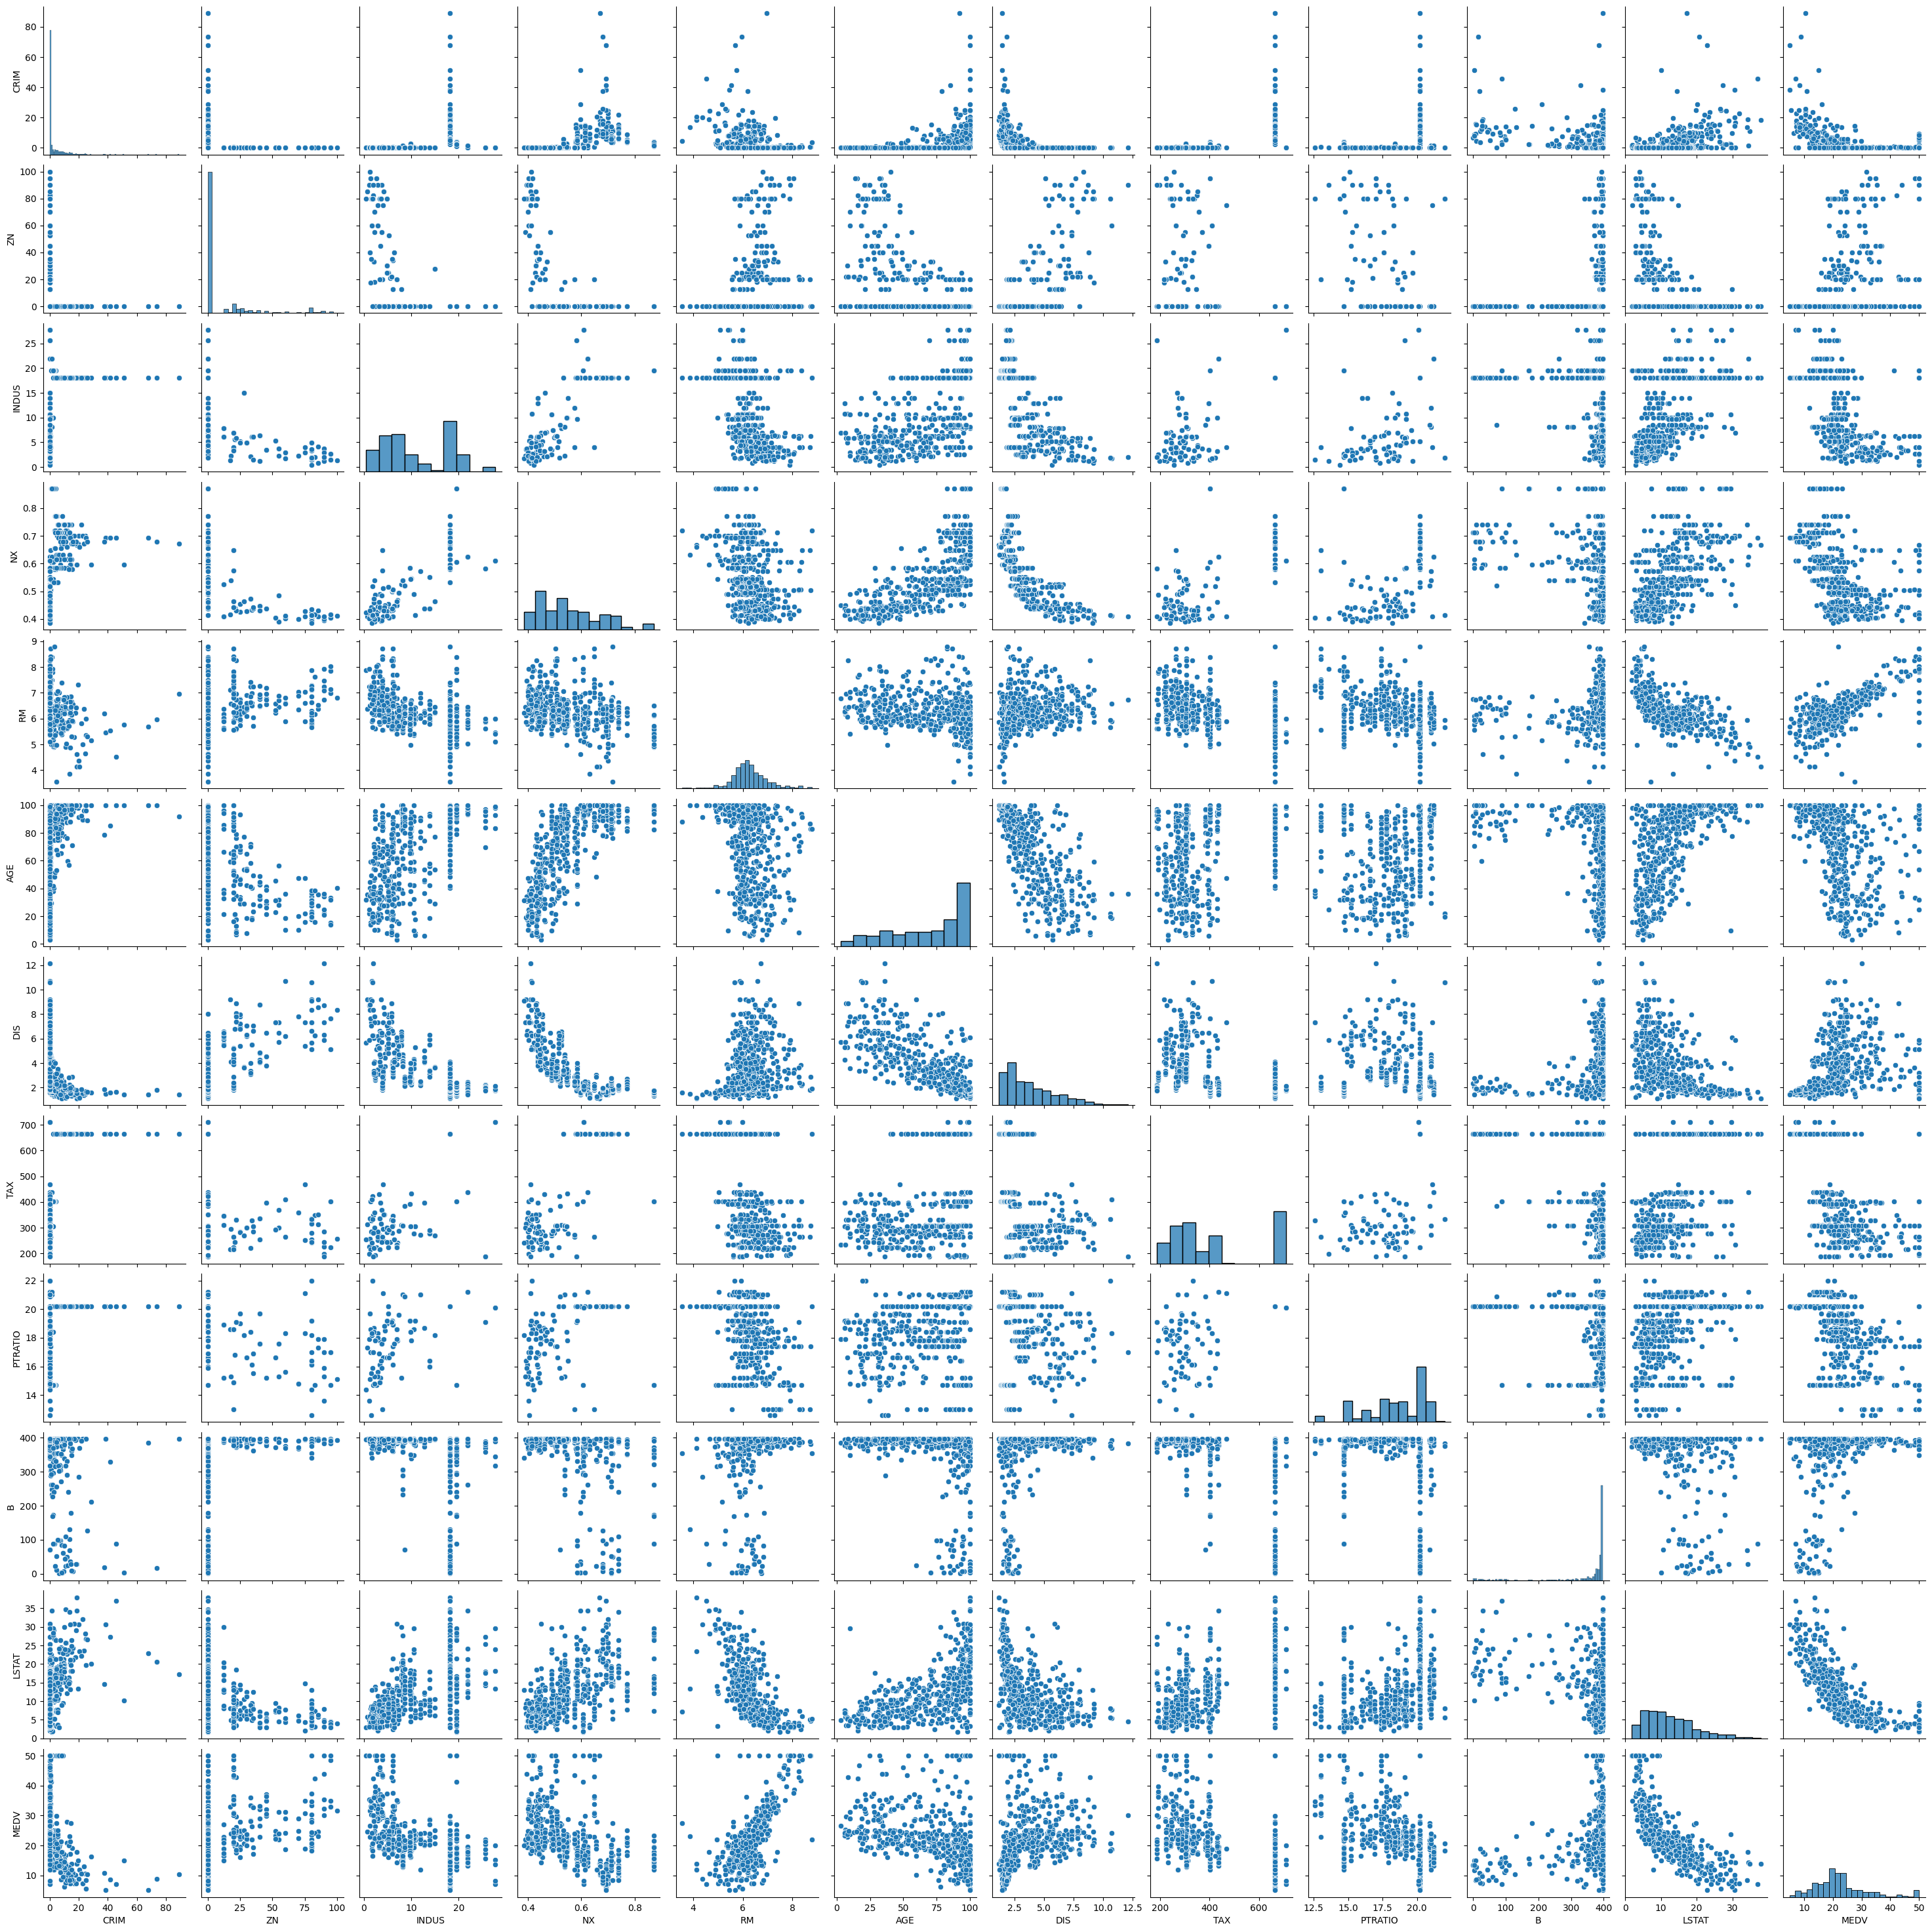

In [5]:
# Parmi les variables restantes, on trace un pairplot
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']])

# Seules LSTAT et RM semblent avoir une relation linéaire avec MEDV
# Mais comme évoqué ci-dessus on ne retire aucune variable a priori

### Preprocessing

In [6]:
# Séparation features / target
X = df.drop('MEDV',axis=1)
y = df['MEDV']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entraînement du modèle Ridge

Best alpha : 10.0
Ordonnée à l'origine : 22.796534653465343


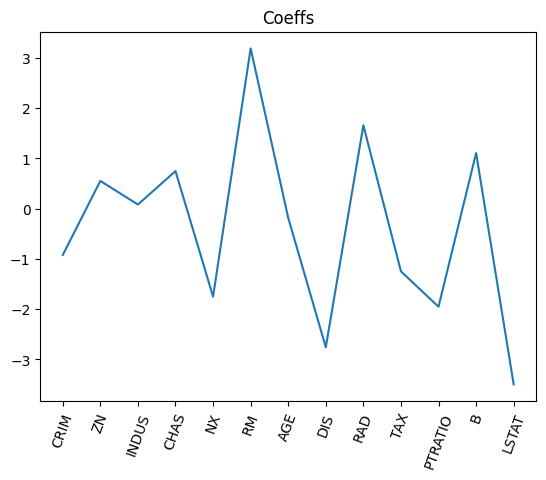

In [10]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=(0.001,0.01,0.1,0.3,0.7,1,10,50,100))
rcv.fit(X_train, y_train)

print ("Best alpha :",rcv.alpha_)
print ("Ordonnée à l'origine :",rcv.intercept_)
plt.plot(X.columns,rcv.coef_)
plt.xticks(X.columns.values, X.columns.values, rotation=70)
plt.title("Coeffs")
plt.show()

### Evaluation rapide du modèle

In [ ]:
# Prédiction sur l'échantillon de test
y_pred = rcv.predict(X_test)

# Calcul du R² sur l'échantillon d'entrainement et de test
print("R² train:",rcv.score(X_train, y_train))
print("R² test:",rcv.score(X_test, y_test))

# Calcul de l'erreur quadratique moyenne sur l'échantillon d'entrainement et de test
from sklearn.metrics import mean_squared_error
print("RMSE train:",np.sqrt(mean_squared_error(y_train, rcv.predict(X_train))))
print("RMSE test:",np.sqrt(mean_squared_error(y_test, y_pred)))

# Le R² est de 0.67 sur l'échantillon de test, ce qui est correct
# Le RMSE de l'échantillon de test est un peu supérieur à celui de l'échantillon d'entraînement, le surapprentissage est léger

R² train: 0.749853646579017
R² test: 0.6659677905050521
RMSE train: 4.661659058541581
RMSE test: 4.949327794727894


### Entraînement du modèle Lasso

Best alpha : 0.015856481375804393
Ordonnée à l'origine : 22.796534653465343


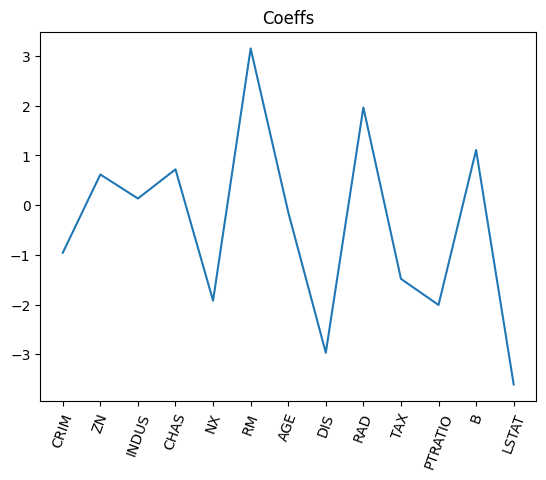

In [13]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=10)
lcv.fit(X_train, y_train)

print ("Best alpha :",lcv.alpha_)
print ("Ordonnée à l'origine :",lcv.intercept_)
plt.plot(X.columns,lcv.coef_)
plt.xticks(X.columns.values, X.columns.values, rotation=70)
plt.title("Coeffs")
plt.show()

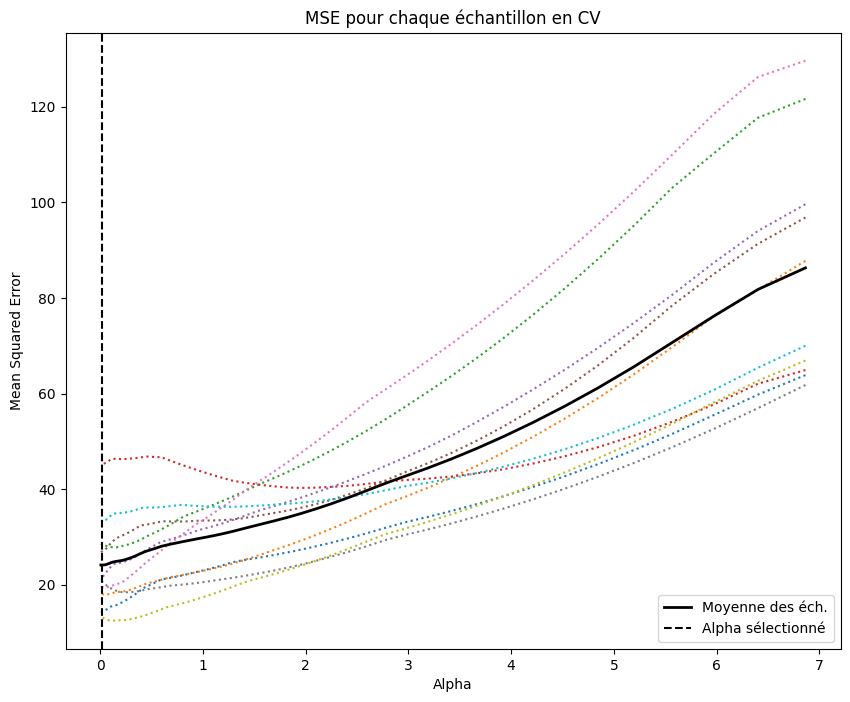

In [17]:
# Comparatif des erreurs en fonction du paramètre de pénalité alpha

plt.figure(figsize = (10, 8))

plt.plot(lcv.alphas_, lcv.mse_path_, ':')
plt.plot(lcv.alphas_, lcv.mse_path_.mean(axis = 1), 'k', label = 'Moyenne des éch.', linewidth = 2)
plt.axvline(lcv.alpha_, linestyle = '--', color = 'k', label = 'Alpha sélectionné')

plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE pour chaque échantillon en CV')
plt.legend()
plt.show()

### Evaluation rapide du modèle

In [15]:
# Prédiction sur l'échantillon de test
y_pred = lcv.predict(X_test)

# Calcul du R² sur l'échantillon d'entrainement et de test
print("R² train:",lcv.score(X_train, y_train))
print("R² test:",lcv.score(X_test, y_test))

# Calcul de l'erreur quadratique moyenne sur l'échantillon d'entrainement et de test
from sklearn.metrics import mean_squared_error
print("RMSE train:",np.sqrt(mean_squared_error(y_train, lcv.predict(X_train))))
print("RMSE test:",np.sqrt(mean_squared_error(y_test, y_pred)))

# Le R² est de 0.67 sur l'échantillon de test, ce qui est correct
# Le RMSE de l'échantillon de test est un peu supérieur à celui de l'échantillon d'entraînement, le surapprentissage est léger

R² train: 0.7506797673699035
R² test: 0.6677265413293845
RMSE train: 4.653955011922794
RMSE test: 4.936280965269446
